In [3]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.utils import median_survival_times
import matplotlib.pyplot as plt

In [4]:
from lifelines import KaplanMeierFitter
#survival analysis 

In [5]:
from lifelines import CoxPHFitter
from lifelines.utils import median_survival_times

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Read data
data = pd.read_csv("C:\\Users\\mehak\\Downloads\\nlst_participant_data.csv", index_col = 0, low_memory = False)

In [8]:
data.shape

(53452, 355)

In [9]:
data.columns

Index(['dataset_version', 'elig', 'ineligible', 'pid', 'rndgroup', 'study',
       'age', 'educat', 'ethnic', 'gender',
       ...
       'finaldeathlc', 'hasdcf', 'ndicd', 'evp_revr', 'evpcert', 'evpdeath',
       'evpdirect', 'evpincomplete', 'evpsel', 'evpsent'],
      dtype='object', length=355)

In [10]:
selected_columns = ['age','gender','race','lung_cancer','canc_free_days','candx_days']

In [11]:
new_data = data[selected_columns]

In [12]:
new_data.head()

,age,gender,race,lung_cancer,canc_free_days,candx_days
cen,,,,,,
BG,70,1,1,0,2353,NaN
AF,66,1,1,0,2391,NaN
AR,64,1,1,0,2381,NaN
AF,60,1,1,0,2688,NaN
AA,64,1,1,0,2435,NaN


In [13]:
data['time'] = (new_data["canc_free_days"] * (1 - new_data["lung_cancer"])) + np.nan_to_num(new_data["candx_days"], nan=0)

In [14]:
(new_data["canc_free_days"] * (1 - new_data["lung_cancer"])) + np.nan_to_num(new_data["candx_days"], nan=0)

cen
BG    2353.0
AF    2391.0
AR    2381.0
AF    2688.0
AA    2435.0
       ...  
AE    2245.0
BA    2380.0
BF    2577.0
AJ    2305.0
AY    2547.0
Length: 53452, dtype: float64

In [15]:
final_columns = ['age','gender','race','time','lung_cancer']

In [16]:
final_data = data[final_columns]

In [17]:
final_data.head()

,age,gender,race,time,lung_cancer
cen,,,,,
BG,70,1,1,2353.0,0
AF,66,1,1,2391.0,0
AR,64,1,1,2381.0,0
AF,60,1,1,2688.0,0
AA,64,1,1,2435.0,0


In [18]:
final_data.isnull().sum()

age            0
gender         0
race           0
time           0
lung_cancer    0
dtype: int64

<Axes: xlabel='timeline'>

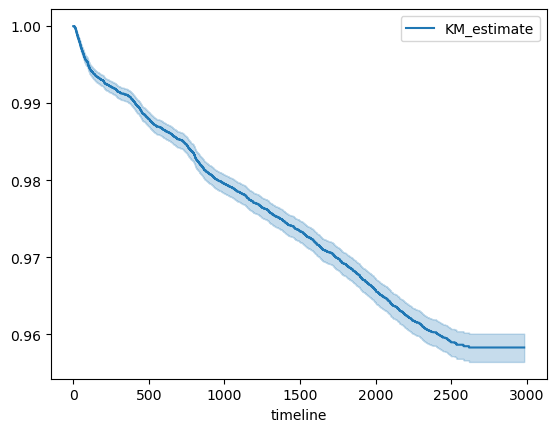

In [19]:
kmf = KaplanMeierFitter()
kmf.fit(durations = final_data["time"], event_observed = final_data["lung_cancer"])
kmf.plot_survival_function()

<Axes: xlabel='timeline'>

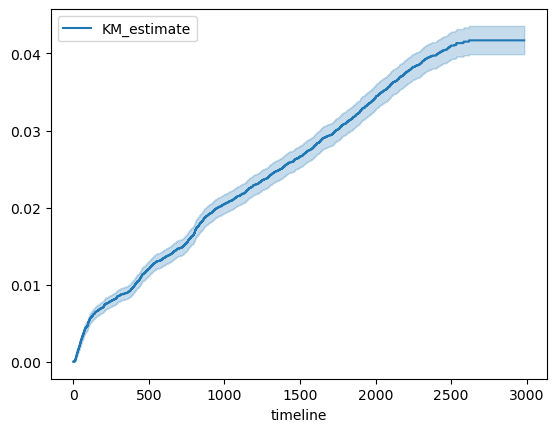

In [20]:
kmf.plot_cumulative_density()

In [21]:
from lifelines.utils import median_survival_times

In [22]:
median = kmf.median_survival_time_

In [23]:
median_confidence_interval = median_survival_times(kmf.confidence_interval_)

In [24]:
print(median)
print(median_confidence_interval)

inf
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     inf                     inf


In [25]:
T = final_data['time']
E = final_data['lung_cancer']

Text(0.5, 1.0, 'Survival of different gender group')

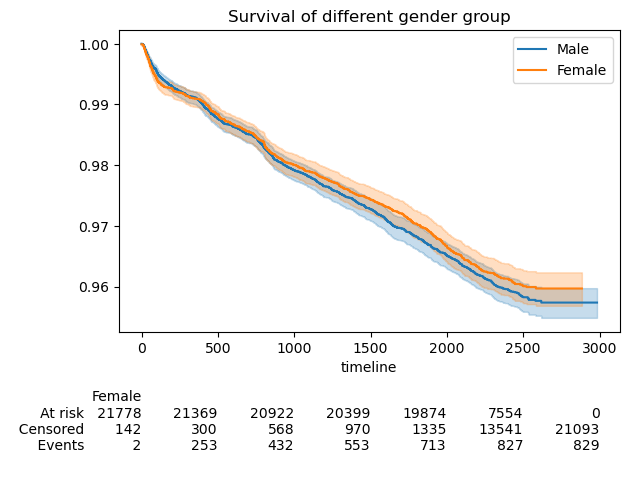

In [26]:
ax = plt.subplot(111)
m = (final_data["gender"] == 1)
kmf.fit(durations = T[m], event_observed = E[m], label = "Male")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[~m], event_observed = E[~m], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different gender group")

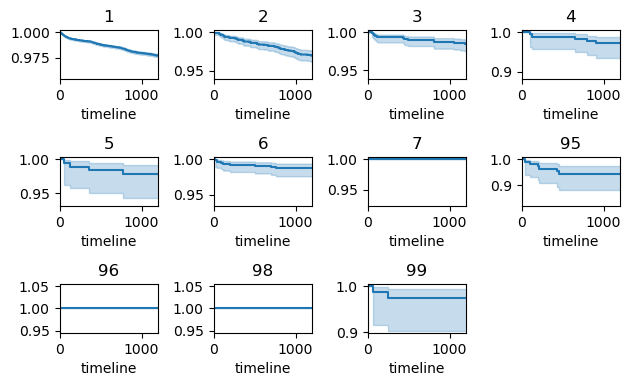

In [27]:
race_categories = final_data.sort_values(by = ['race'])["race"].unique()
for i, race_categories in enumerate(race_categories):
  ax = plt.subplot(4, 4, i + 1)
  ix = data['race'] == race_categories
  kmf.fit(T[ix], E[ix], label = race_categories)
  kmf.plot_survival_function(ax = ax, legend = False)
  plt.title(race_categories)
  plt.xlim(0, 1200)
plt.tight_layout()

In [35]:
final_data = final_data[final_data["race"] != 96]
final_data = final_data[final_data["race"] != 98]
#final_data = final_data[final_data["race"] != 7]

In [36]:
final_data['race'].value_counts()

race
1     48549
2      2376
3      1095
6       679
5       193
4       190
95      175
7       109
99       81
Name: count, dtype: int64

In [37]:
dummies_race = pd.get_dummies(final_data["race"], prefix = 'race')
dummies_race.head(4)

,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_95,race_99
cen,,,,,,,,,
BG,True,False,False,False,False,False,False,False,False
AF,True,False,False,False,False,False,False,False,False
AR,True,False,False,False,False,False,False,False,False
AF,True,False,False,False,False,False,False,False,False


In [39]:
dummies_race = dummies_race[["race_2", "race_3", "race_4", "race_5", "race_6", "race_7", "race_95", "race_99"]]
dummies_race = dummies_race.astype(int)
final_data_ = pd.concat([final_data, dummies_race], axis = 1)
final_data_ = final_data_.drop("race", axis = 1)
final_data_.head()

,age,gender,time,lung_cancer,race_2,race_3,race_4,race_5,race_6,race_7,race_95,race_99
cen,,,,,,,,,,,,
BG,70,1,2353.0,0,0,0,0,0,0,0,0,0
AF,66,1,2391.0,0,0,0,0,0,0,0,0,0
AR,64,1,2381.0,0,0,0,0,0,0,0,0,0
AF,60,1,2688.0,0,0,0,0,0,0,0,0,0
AA,64,1,2435.0,0,0,0,0,0,0,0,0,0


In [40]:
from lifelines import CoxPHFitter

In [41]:
cph = CoxPHFitter()
cph.fit(final_data_, duration_col = 'time', event_col = 'lung_cancer')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 53447 total observations, 51389 right-censored observations>
             duration col = 'time'
                event col = 'lung_cancer'
      baseline estimation = breslow
   number of observations = 53447
number of events observed = 2058
   partial log-likelihood = -22010.94
         time fit was run = 2024-01-05 15:18:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.08       1.09       0.00             0.08             0.09                 1.08                 1.10
gender     -0.02       0.99       0.05            -0.10             0.07                 0.90                 1.08
race_2      0.26       1.30       0.10             0.06             0.46                 1.06                 1.58
race_3     -0.21       0.81       0.17            -0.54             0.12                 0.58                 1.13
race_4      0.41       1.50       0.32            -0.22             1.03                 0.81                 2.79
race_5     -0.28       0.76       0.45            -1.16             0.60                 0.31                 1.82
race_6     -0.07       0.93       0.21            -0.49             0.35                 0.61                 1.42
race_7     -1.39       0.25       1.00            -3.35             0.57                 0.04                 1.77
race_95     0.99       2.70       0.33             0.34             1.65                 1.40                 5.19
race_99    -0.33       0.72       0.71            -1.72             1.05                 0.18                 2.87

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00 20.88 <0.005     319.21
gender        0.00 -0.34   0.74       0.44
race_2        0.00  2.56   0.01       6.59
race_3        0.00 -1.24   0.22       2.21
race_4        0.00  1.28   0.20       2.32
race_5        0.00 -0.62   0.53       0.91
race_6        0.00 -0.33   0.74       0.43
race_7        0.00 -1.39   0.16       2.61
race_95       0.00  2.97 <0.005       8.39
race_99       0.00 -0.47   0.64       0.65
---
Concordance = 0.50
Partial AIC = 44041.88
log-likelihood ratio test = 436.10 on 10 df
-log2(p) of ll-ratio test = 288.06

<Axes: xlabel='log(HR) (95% CI)'>

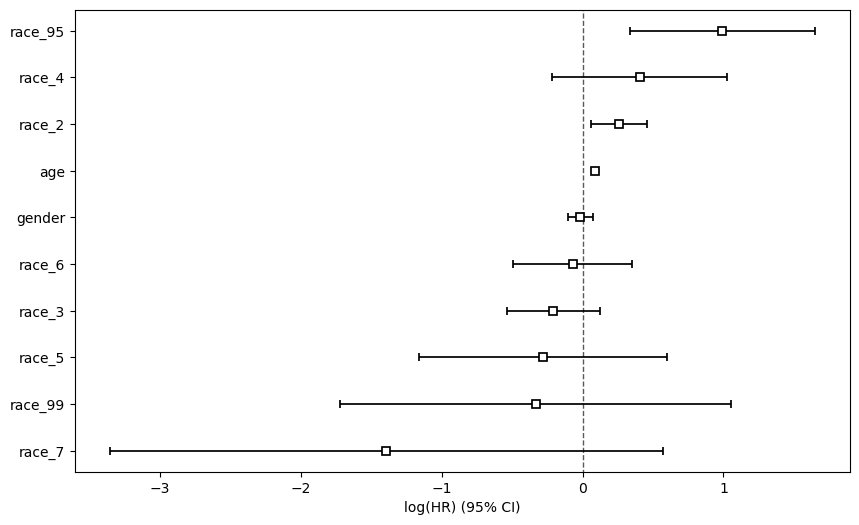

In [47]:
plt.subplots(figsize = (10, 6))
cph.plot()

In [82]:
test = [[66,0,0,0,0,0,0,0,0,0]]

In [83]:
test_pd = pd.DataFrame(test, 
        columns=[
            "age",
            "gender",
            "race_2",
            "race_3",
            "race_4",
            "race_5",
            "race_6",
            "race_7",
            "race_95",
            "race_99"
        ])

In [84]:
cph.predict_survival_function(test_pd, times=[250,500,1000])

,0
250.0,0.989348
500.0,0.983641
1000.0,0.972260


In [ ]:
##################################################################

In [42]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter

In [54]:
final_data_.head()

,age,gender,time,lung_cancer,race_2,race_3,race_4,race_5,race_6,race_7,race_95,race_99
cen,,,,,,,,,,,,
BG,70,1,2353.0,0,0,0,0,0,0,0,0,0
AF,66,1,2391.0,0,0,0,0,0,0,0,0,0
AR,64,1,2381.0,0,0,0,0,0,0,0,0,0
AF,60,1,2688.0,0,0,0,0,0,0,0,0,0
AA,64,1,2435.0,0,0,0,0,0,0,0,0,0


In [55]:
non_positive_durations = final_data_["time"] <= 0

In [56]:
non_positive_durations.sum()

414

In [57]:
final_data_["time"].sum()

122102792.0

In [59]:
final_data_["time_adjusted"] = final_data_["time"].replace(to_replace=0, value=0.1)

In [63]:
final_data_.head()

,age,gender,time,lung_cancer,race_2,race_3,race_4,race_5,race_6,race_7,race_95,race_99,time_adjusted
cen,,,,,,,,,,,,,
BG,70,1,2353.0,0,0,0,0,0,0,0,0,0,2353.0
AF,66,1,2391.0,0,0,0,0,0,0,0,0,0,2391.0
AR,64,1,2381.0,0,0,0,0,0,0,0,0,0,2381.0
AF,60,1,2688.0,0,0,0,0,0,0,0,0,0,2688.0
AA,64,1,2435.0,0,0,0,0,0,0,0,0,0,2435.0


In [62]:
non_positive_durations_ = final_data_["time_adjusted"] <= 0
non_positive_durations_.sum()

0

In [64]:
AFT_columns = ['age','gender', 'lung_cancer', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6', 'race_7', 'race_95', 'race_99', 'time_adjusted'] 

In [65]:
AFT_data = final_data_[AFT_columns]

In [66]:
AFT_data.head()

,age,gender,lung_cancer,race_2,race_3,race_4,race_5,race_6,race_7,race_95,race_99,time_adjusted
cen,,,,,,,,,,,,
BG,70,1,0,0,0,0,0,0,0,0,0,2353.0
AF,66,1,0,0,0,0,0,0,0,0,0,2391.0
AR,64,1,0,0,0,0,0,0,0,0,0,2381.0
AF,60,1,0,0,0,0,0,0,0,0,0,2688.0
AA,64,1,0,0,0,0,0,0,0,0,0,2435.0


In [71]:
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()
for model in [wb, ex, log, loglogis]:
    model.fit(durations = AFT_data["time_adjusted"], event_observed = AFT_data["lung_cancer"])
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 49175.46684266222
The AIC value for ExponentialFitter is 49356.479482394054
The AIC value for LogNormalFitter is 49198.26826631989
The AIC value for LogLogisticFitter is 49176.486305658414


In [72]:
from lifelines import WeibullAFTFitter

In [76]:
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(AFT_data, duration_col='time_adjusted', event_col='lung_cancer')
#weibull_aft.print_summary

C:\Users\mehak\anaconda3\Lib\site-packages\lifelines\utils\__init__.py:935: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


ValueError: cannot reindex on an axis with duplicate labels